#MVP: Dataset do Câncer de *Mama*
###Carregamento e exploração inicial do dataset relacionado ao câncer de mama, onde haverá o retorno do diagnostico.

In [57]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset
Carregamento e Exploração Inicial do Dataset:
<br>

Descrição: <br>

* Carregamento do dataset relacionado ao câncer de mama.
* Transformação do diagnóstico para valores numéricos: Benigno (B) = 0, Maligno (M) = 1.
* Reorganização das colunas, movendo 'diagnosis' para o final.
Visualização das primeiras linhas do dataset.

<br>

Propósito:
* Preparação inicial do conjunto de dados para análise e modelagem.

In [58]:
import pandas as pd

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/FelipeAmorimReis/CancerMama-MVP-MachineLearning/main/CSV/breast-cancer-wisconsin-data/data.csv"

# Lê o arquivo, ignorando a última coluna, pois não continha informações úteis para a análise
dataset = pd.read_csv(url, delimiter=',', usecols=lambda column: column != 'Unnamed: 32')

 # Alterando retorno, onde: Beligno: 0 | Maligno: 1
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1})

# Reorganiza as colunas, movendo 'diagnosis' para o final
dataset = dataset[[col for col in dataset.columns if col != 'diagnosis'] + ['diagnosis']]

# Mostra todas as colunas
pd.set_option('display.max_columns', None)

# Mostra as primeiras linhas do dataset
dataset.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1



## Separação em conjunto de treino e conjunto de teste com holdout

Descrição:

* Definição do tamanho do conjunto de teste (20% do dataset).
* Utilização de uma semente aleatória para garantir reproducibilidade.
* Separação dos conjuntos de treino e teste utilizando a técnica de holdout com estratificação.
* Parâmetros e configurações para a validação cruzada com estratificação.

<br>
Propósito:

* Divisão dos dados em conjuntos de treino e teste para treinamento e avaliação dos modelos.

In [59]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:31]
y = array[:,31]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência


# Avaliação de Modelos:

Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de modelos de classificação, incluindo KNN, Decision Tree, Naive Bayes e SVM.
* Avaliação dos modelos por meio da validação cruzada com estratificação.
* Exibição de um boxplot comparativo dos desempenhos dos modelos.

<br>
Propósito:

* Análise comparativa inicial dos modelos em termos de acurácia.

KNN: 0.771498 (0.049258)
CART: 0.938551 (0.027176)
NB: 0.630773 (0.018633)
SVM: 0.626329 (0.014349)


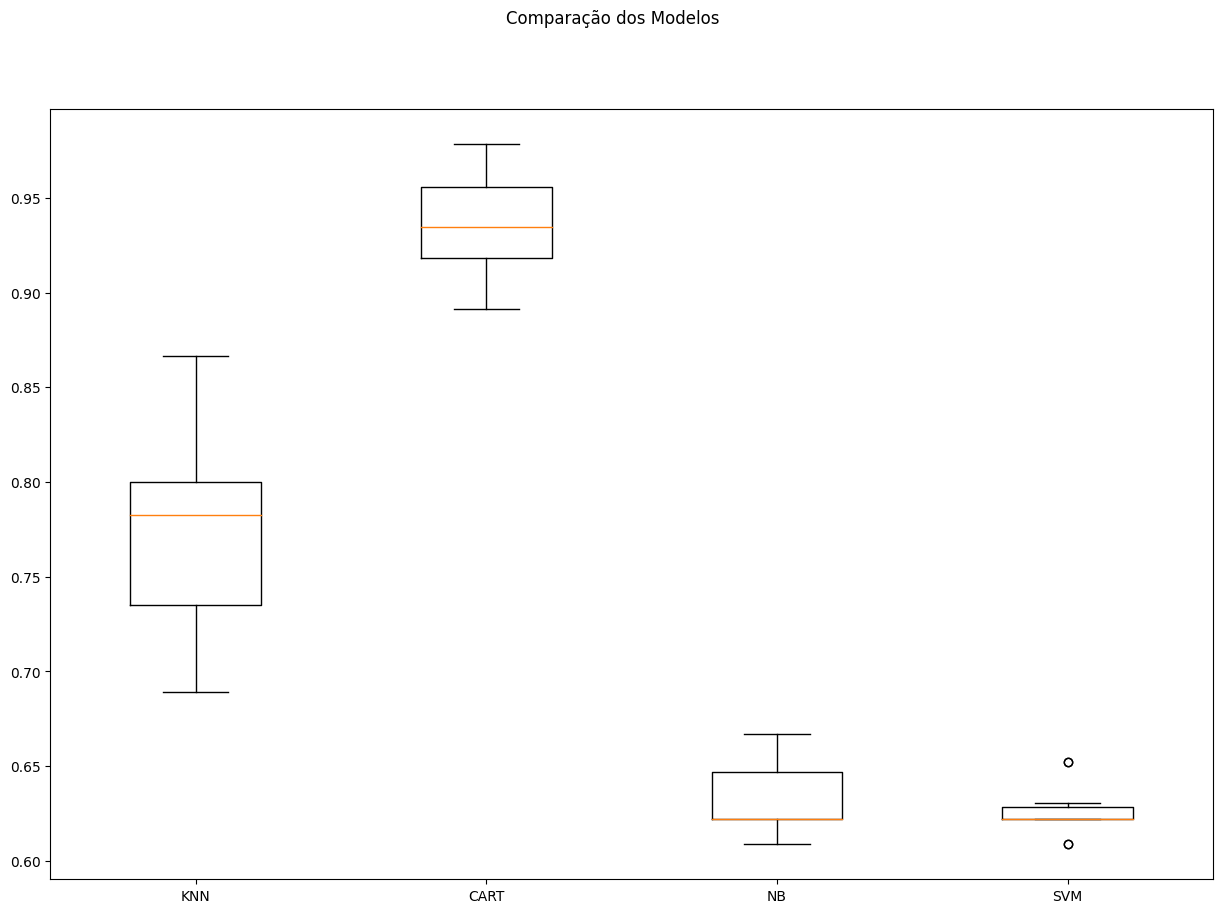

In [60]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados


Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de pipelines para cada algoritmo de classificação, aplicando diferentes transformações nos dados.
* Algoritmos utilizados: KNN, Árvore de Classificação, Naive Bayes e SVM.
* Transformações aplicadas: Original, Padronizado (StandardScaler) e Normalizado (MinMaxScaler).
* Avaliação dos modelos por meio da validação cruzada com estratificação.
* Exibição de um boxplot comparativo dos desempenhos dos modelos.

<br>
Propósito:

* Analisar o impacto das transformações de dados nos modelos de classificação, permitindo a escolha da abordagem mais adequada.

KNN-orig: 0.771 (0.049)
CART-orig: 0.939 (0.027)
NB-orig: 0.631 (0.019)
SVM-orig: 0.626 (0.014)
KNN-padr: 0.969 (0.020)
CART-padr: 0.943 (0.024)
NB-padr: 0.945 (0.029)
SVM-padr: 0.972 (0.034)
KNN-norm: 0.974 (0.013)
CART-norm: 0.945 (0.022)
NB-norm: 0.945 (0.029)
SVM-norm: 0.976 (0.033)


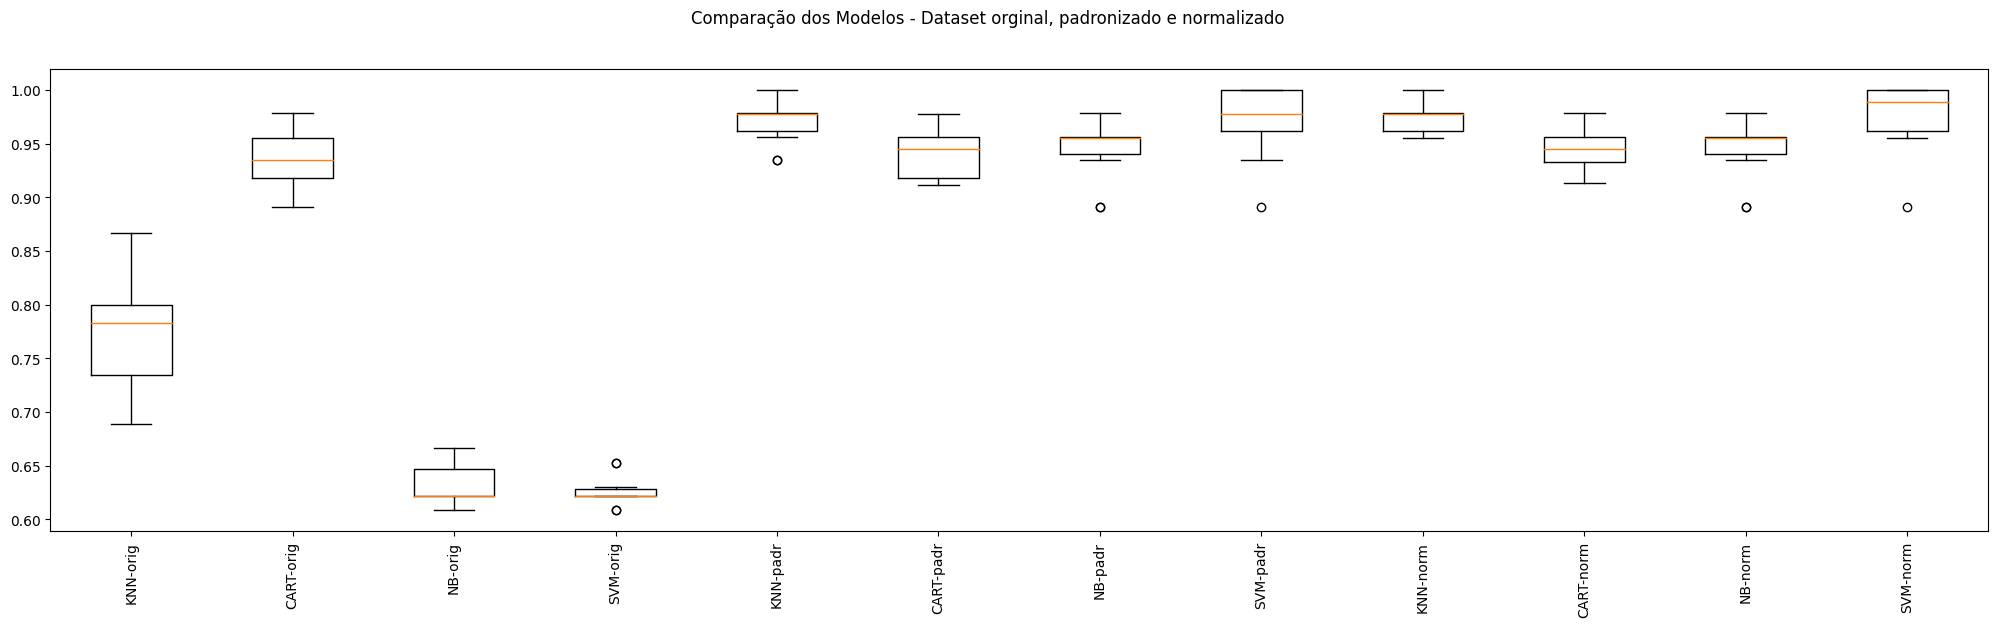

In [61]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Descrição:

* Definição de uma semente global para garantir a reprodutibilidade.
* Criação de pipelines para o KNN considerando diferentes transformações nos dados: Original, Padronizado (StandardScaler) e Normalizado (MinMaxScaler).
* Especificação de um conjunto de hiperparâmetros a serem avaliados por meio do GridSearchCV.
* Avaliação dos modelos com validação cruzada e busca pelos melhores hiperparâmetros.
* Exibição da melhor configuração encontrada para cada abordagem de dados.

<br>

Propósito:

* Otimizar os hiperparâmetros do KNN para melhorar seu desempenho, considerando diferentes transformações de dados.


In [62]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.857246 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.975990 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.975990 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


## Finalização do Modelo

Descrição:

* Padronização do conjunto de treino usando o scaler ajustado a esse conjunto.
* Treinamento do modelo KNN com os hiperparâmetros otimizados (manhattan distance, 17 vizinhos).
* Padronização do conjunto de teste utilizando o mesmo scaler.
* Predição das classes no conjunto de teste e cálculo da acurácia.

<br>
Propósito:

* Avaliar o desempenho do modelo KNN otimizado utilizando o conjunto de testes.

In [63]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9210526315789473


In [64]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

## Simulando a aplicação do modelo em dados não vistos

In [70]:
# Novos dados - não sabemos a classe!
data_entrada = {
    'id': [800, 801, 802],
    'radius_mean': [10, 25, 3],
    'texture_mean': [5, 30, 3],
    'perimeter_mean': [50, 150, 3],
    'area_mean': [200, 1500, 3],
    'smoothness_mean': [0.1, 0.2, 3],
    'compactness_mean': [0.05, 0.3, 3],
    'concavity_mean': [0.1, 0.4, 3],
    'concave points_mean': [0.05, 0.2, 3],
    'symmetry_mean': [0.1, 0.3, 3],
    'fractal_dimension_mean': [0.05, 0.2, 3],
    'radius_se': [0.1, 1.0, 3],
    'texture_se': [0.1, 1.5, 3],
    'perimeter_se': [1, 10, 3],
    'area_se': [10, 100, 3],
    'smoothness_se': [0.005, 0.02, 3],
    'compactness_se': [0.005, 0.03, 3],
    'concavity_se': [0.01, 0.05, 3],
    'concave points_se': [0.005, 0.03, 3],
    'symmetry_se': [0.01, 0.03, 3],
    'fractal_dimension_se': [0.002, 0.01, 3],
    'radius_worst': [12, 30, 3],
    'texture_worst': [10, 35, 3],
    'perimeter_worst': [70, 200, 3],
    'area_worst': [300, 2000, 3],
    'smoothness_worst': [0.1, 0.3, 3],
    'compactness_worst': [0.05, 0.4, 3],
    'concavity_worst': [0.1, 0.5, 3],
    'concave points_worst': [0.05, 0.3, 3],
    'symmetry_worst': [0.1, 0.4, 3],
    'fractal_dimension_worst': [0.05, 0.3, 3],
}

atributos_entrada = [
    'id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
entrada_novos_dados = pd.DataFrame(data_entrada, columns=atributos_entrada)


array_entrada = entrada_novos_dados.values
X_entrada = array_entrada[:,0:31].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-2.43141996e-01 -1.17220945e+00 -3.32529713e+00 -1.72871289e+00
  -1.29375129e+00  2.59022197e-01 -1.02984204e+00  1.40624266e-01
   2.78795323e-02 -2.96317368e+00 -1.81419436e+00 -1.10143004e+00
  -2.02635620e+00 -9.23756439e-01 -6.67467605e-01 -6.80353888e-01
  -1.14451375e+00 -7.25930455e-01 -1.10239912e+00 -1.27644576e+00
  -6.78924796e-01 -8.84074626e-01 -2.55293847e+00 -1.10985646e+00
  -1.02061446e+00 -1.41890617e+00 -1.29941107e+00 -8.26078300e-01
  -9.83732949e-01 -3.07500574e+00 -1.88113521e+00]
 [-2.43141988e-01  3.08800350e+00  2.49237069e+00  2.39030713e+00
   2.40358211e+00  7.37556639e+00  3.70802781e+00  3.90711560e+00
   3.89697688e+00  4.33871312e+00  1.94498665e+01  2.14685897e+00
   5.13725257e-01  3.53151906e+00  1.31268626e+00  4.31984884e+00
   2.52724738e-01  6.00350463e-01  2.95284252e+00  1.14512431e+00
   2.34708594e+00  2.84341091e+00  1.51815632e+00  2.76230254e+00
   1.96783715e+00  7.34827210e+00  9.27077936e-01  1.09293111e+00
   2.82291640e+00  1.7783

In [71]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 1.]
